In [ ]:
# Intialization
import os
import sys

os.environ["SPARK_HOME"] = "/home/talentum/spark"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3.6" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/bin/python3"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

# NOTE: Whichever package you want mention here.
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0 pyspark-shell' 
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.3 pyspark-shell'
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'

In [ ]:
#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

## Load data from hive

In [35]:
# Load Hive table into DataFrame
comm = spark.table("instagram_comments")

# Display the DataFrame contents
comm.show()

+--------------+--------------------+--------------------+------------+-----+----------+
|     shortcode|            username|        comment_text|comment_date|likes|post_owner|
+--------------+--------------------+--------------------+------------+-----+----------+
|Post Shortcode|            Username|        Comment Text|Comment Date|Likes|Post Owner|
|   C-asOz_olPd|      vibhasingh2916|                Nice|  2024-08-13|    7| cristiano|
|   C-asOz_olPd|           moaanaa87|Please help me he...|  2024-08-13|    2| cristiano|
|   C-asOz_olPd|          mahdi_i_m_|PEPE THE BEST CB ...|  2024-08-13|    4| cristiano|
|   C-asOz_olPd|      _ektara_vatss_|       shut up oldie|  2024-08-13|    2| cristiano|
|   C-asOz_olPd|           muhar.007|                    |  2024-08-13|    4| cristiano|
|   C-asOz_olPd|       sendonet_inst|I will miss your ...|  2024-08-13|    6| cristiano|
|   C-asOz_olPd|           ilios7153|               Hello|  2024-08-13|    3| cristiano|
|   C-asOz_olPd|     

In [36]:
comm=comm.filter(~comm.shortcode.contains("Post Shortcode"))
comm.show()

+-----------+--------------------+--------------------+------------+-----+----------+
|  shortcode|            username|        comment_text|comment_date|likes|post_owner|
+-----------+--------------------+--------------------+------------+-----+----------+
|C-asOz_olPd|      vibhasingh2916|                Nice|  2024-08-13|    7| cristiano|
|C-asOz_olPd|           moaanaa87|Please help me he...|  2024-08-13|    2| cristiano|
|C-asOz_olPd|          mahdi_i_m_|PEPE THE BEST CB ...|  2024-08-13|    4| cristiano|
|C-asOz_olPd|      _ektara_vatss_|       shut up oldie|  2024-08-13|    2| cristiano|
|C-asOz_olPd|           muhar.007|                    |  2024-08-13|    4| cristiano|
|C-asOz_olPd|       sendonet_inst|I will miss your ...|  2024-08-13|    6| cristiano|
|C-asOz_olPd|           ilios7153|               Hello|  2024-08-13|    3| cristiano|
|C-asOz_olPd|         khadija_a_l|         :red_heart:|  2024-08-13|    6| cristiano|
|C-asOz_olPd|           jozhuaprz|Todo está llegand...

In [37]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import NLP packages
from textblob import TextBlob

# Import warnings package
import warnings
warnings.filterwarnings("ignore")

## Create user defined function for sentiment analysis

In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from textblob import TextBlob
from pyspark.sql.types import FloatType

# Create a SparkSession
spark = SparkSession.builder.appName("Sentiment Analysis").getOrCreate()

# Create a sample DataFrame with text data
data = [("The movie is good",), ("The movie is bad",), ("The movie is okay",)]
df = spark.createDataFrame(data, ["text"])

# Define a UDF (User-Defined Function) to perform sentiment analysis
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Register the UDF
udf_sentiment = udf(sentiment_analysis, FloatType())

# Apply the UDF to the DataFrame
df_with_sentiment = df.withColumn("sentiment", udf_sentiment("text"))

# Show the results
df_with_sentiment.show()

+-----------------+---------+
|             text|sentiment|
+-----------------+---------+
|The movie is good|      0.7|
| The movie is bad|     -0.7|
|The movie is okay|      0.5|
+-----------------+---------+



In [94]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VaderSentimentIntensityAnalyzer
import nltk
data = [("The movie is good",), ("The movie is bad",), ("The movie is okay",)]
df = spark.createDataFrame(data, ["text"])
def nltk_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']
def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Function for VADER sentiment analysis
def vader_sentiment(text):
    analyzer = VaderSentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)['compound']

udf_nltk = udf(nltk_sentiment, FloatType())
udf_textBlob = udf(textblob_sentiment, FloatType())
udf_vader = udf(vader_sentiment, FloatType())
# Apply the UDF to the DataFrame
df_with_nltk_sentiment = df.withColumn("sentiment", udf_nltk("text"))
df_with_tb_sentiment = df.withColumn("sentiment", udf_textBlob("text"))
df_with_vader_sentiment = df.withColumn("sentiment", udf_vader("text"))

# Show the results

df_with_nltk_sentiment.show()
df_with_tb_sentiment.show()
df_with_vader_sentiment.show()

+-----------------+---------+
|             text|sentiment|
+-----------------+---------+
|The movie is good|   0.4404|
| The movie is bad|  -0.5423|
|The movie is okay|   0.2263|
+-----------------+---------+

+-----------------+---------+
|             text|sentiment|
+-----------------+---------+
|The movie is good|      0.7|
| The movie is bad|     -0.7|
|The movie is okay|      0.5|
+-----------------+---------+

+-----------------+---------+
|             text|sentiment|
+-----------------+---------+
|The movie is good|   0.4404|
| The movie is bad|  -0.5423|
|The movie is okay|   0.2263|
+-----------------+---------+



In [39]:
from pyspark.sql.functions import udf
from textblob import TextBlob

# Define a UDF to calculate sentiment polarity
@udf("double")
def sentiment_polarity(text):
    try:
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    except:
        return 0.0

# Create a new column with sentiment polarity
comm_with_polarity = comm.withColumn("polarity", sentiment_polarity(comm.comment_text))

# Show the first 20 rows
comm_with_polarity.show(20)

+-----------+--------------------+--------------------+------------+-----+----------+-------------------+
|  shortcode|            username|        comment_text|comment_date|likes|post_owner|           polarity|
+-----------+--------------------+--------------------+------------+-----+----------+-------------------+
|C-asOz_olPd|      vibhasingh2916|                Nice|  2024-08-13|    7| cristiano|                0.6|
|C-asOz_olPd|           moaanaa87|Please help me he...|  2024-08-13|    2| cristiano|0.47727272727272735|
|C-asOz_olPd|          mahdi_i_m_|PEPE THE BEST CB ...|  2024-08-13|    4| cristiano|                1.0|
|C-asOz_olPd|      _ektara_vatss_|       shut up oldie|  2024-08-13|    2| cristiano|                0.0|
|C-asOz_olPd|           muhar.007|                    |  2024-08-13|    4| cristiano|                0.0|
|C-asOz_olPd|       sendonet_inst|I will miss your ...|  2024-08-13|    6| cristiano|                0.0|
|C-asOz_olPd|           ilios7153|            

In [40]:
from pyspark.sql.functions import when

comm_with_polarity1 = comm_with_polarity.withColumn("polarity",
                       when(comm_with_polarity.polarity == 0, 'Neutral')
                       .when(comm_with_polarity.polarity > 0, 'Positive')
                       .when(comm_with_polarity.polarity < 0, 'Negative')
                      )
comm_with_polarity1.show()

+-----------+--------------------+--------------------+------------+-----+----------+--------+
|  shortcode|            username|        comment_text|comment_date|likes|post_owner|polarity|
+-----------+--------------------+--------------------+------------+-----+----------+--------+
|C-asOz_olPd|      vibhasingh2916|                Nice|  2024-08-13|    7| cristiano|Positive|
|C-asOz_olPd|           moaanaa87|Please help me he...|  2024-08-13|    2| cristiano|Positive|
|C-asOz_olPd|          mahdi_i_m_|PEPE THE BEST CB ...|  2024-08-13|    4| cristiano|Positive|
|C-asOz_olPd|      _ektara_vatss_|       shut up oldie|  2024-08-13|    2| cristiano| Neutral|
|C-asOz_olPd|           muhar.007|                    |  2024-08-13|    4| cristiano| Neutral|
|C-asOz_olPd|       sendonet_inst|I will miss your ...|  2024-08-13|    6| cristiano| Neutral|
|C-asOz_olPd|           ilios7153|               Hello|  2024-08-13|    3| cristiano| Neutral|
|C-asOz_olPd|         khadija_a_l|         :red_he

In [41]:
df_positive = comm_with_polarity1.filter(comm_with_polarity1.polarity.contains('Positive'))
df_positive.show()

+-----------+--------------------+--------------------+------------+-----+----------+--------+
|  shortcode|            username|        comment_text|comment_date|likes|post_owner|polarity|
+-----------+--------------------+--------------------+------------+-----+----------+--------+
|C-asOz_olPd|      vibhasingh2916|                Nice|  2024-08-13|    7| cristiano|Positive|
|C-asOz_olPd|           moaanaa87|Please help me he...|  2024-08-13|    2| cristiano|Positive|
|C-asOz_olPd|          mahdi_i_m_|PEPE THE BEST CB ...|  2024-08-13|    4| cristiano|Positive|
|C-asOz_olPd|         raywontmiss|ronaldo is better...|  2024-08-13|    4| cristiano|Positive|
|C-asOz_olPd|       rizalzaelan1_|Athena Ultah!! Dr...|  2024-08-13|    4| cristiano|Positive|
|C-asOz_olPd|          libra_96ss|LBLBLBLBL LBLBLBL...|  2024-08-13|    2| cristiano|Positive|
|C-asOz_olPd|        ahmedeid8317|Long live Chris:c...|  2024-08-13|    7| cristiano|Positive|
|C-asOz_olPd|           paul_pst7|Volte para o Rea

In [42]:
df_negative = comm_with_polarity1.filter(comm_with_polarity1.polarity =='Negative')
df_negative.show()

+-----------+-----------------+--------------------+------------+-----+----------+--------+
|  shortcode|         username|        comment_text|comment_date|likes|post_owner|polarity|
+-----------+-----------------+--------------------+------------+-----+----------+--------+
|C-asOz_olPd|       ahmeth5908|Pepe crying when ...|  2024-08-13|    1| cristiano|Negative|
|C-asOz_olPd|      mostafir_77|                  :(|  2024-08-13|    0| cristiano|Negative|
|C-asOz_olPd|  karanmaravi9596|Z kaha par hai me...|  2024-08-13|    0| cristiano|Negative|
|C-asOz_olPd|         krymremk|please let me rea...|  2024-08-13|    0| cristiano|Negative|
|C-asOz_olPd|       broklyn.61|Hello champion, I...|  2024-08-13|    0| cristiano|Negative|
|C-asOz_olPd|   jamesjohn32222|I'm single from C...|  2024-08-13|    0| cristiano|Negative|
|C-asOz_olPd|      cutecate775|Im very poor plea...|  2024-08-13|    2| cristiano|Negative|
|C-asOz_olPd| communicate.news|The painful narra...|  2024-08-13|    1| cristian

In [43]:
df_neutral = comm_with_polarity1.filter(comm_with_polarity1.polarity == 'Neutral')
df_neutral.show(truncate=False)

+-----------+------------------------------+----------------------------------------------------------------------------------+------------+-----+----------+--------+
|shortcode  |username                      |comment_text                                                                      |comment_date|likes|post_owner|polarity|
+-----------+------------------------------+----------------------------------------------------------------------------------+------------+-----+----------+--------+
|C-asOz_olPd|_ektara_vatss_                |shut up oldie                                                                     |2024-08-13  |2    |cristiano |Neutral |
|C-asOz_olPd|muhar.007                     |                                                                                  |2024-08-13  |4    |cristiano |Neutral |
|C-asOz_olPd|sendonet_inst                 |I will miss your friendship with Pepe                                             |2024-08-13  |6    |cristiano |Neutral 

In [31]:
#comm_with_polarity.show(10)
df1 = comm_with_polarity1.select("comment_text","polarity")
df1.show(10)

+--------------------+--------+
|        comment_text|polarity|
+--------------------+--------+
|                Nice|Positive|
|Please help me he...|Positive|
|PEPE THE BEST CB ...|Positive|
|       shut up oldie| Neutral|
|                    | Neutral|
|I will miss your ...| Neutral|
|               Hello| Neutral|
|         :red_heart:| Neutral|
|Todo está llegand...| Neutral|
|:raising_hands::r...| Neutral|
+--------------------+--------+
only showing top 10 rows



Pol: Positive, Count: <built-in method count of Row object at 0x7efd7a643ef8>
Pol: Neutral, Count: <built-in method count of Row object at 0x7efd7a792048>
Pol: Negative, Count: <built-in method count of Row object at 0x7efd7a643e58>


<AxesSubplot:>

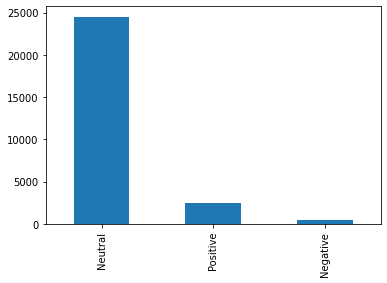

In [45]:
from pyspark.sql.functions import col

# Value counts
pol_counts = comm_with_polarity1.groupBy(col("polarity")).count().collect()

# Print value counts
for row in pol_counts:
    print(f"Pol: {row.polarity}, Count: {row.count}")

# Plotting is not directly possible in PySpark, but you can convert to Pandas and plot
pdf = comm_with_polarity1.toPandas()
pol_counts_pdf = pdf['polarity'].value_counts()
pol_counts_pdf.plot.bar()

In [60]:
dbt=comm_with_polarity1
dbt=dbt.fillna({'likes':0})
dbt.filter(dbt.likes.isNull()).count()

0

In [65]:
 dbt=dbt.na.drop()

In [73]:
from pyspark.sql.functions import col
dbt = dbt.withColumn("likes", col("likes").cast("Integer"))

In [74]:
dbt.dtypes

[('shortcode', 'string'),
 ('username', 'string'),
 ('comment_text', 'string'),
 ('comment_date', 'string'),
 ('likes', 'int'),
 ('post_owner', 'string'),
 ('polarity', 'string')]

In [76]:
#sort based on likes
q1 = dbt.sort(dbt.likes.desc())
q1 = q1.select("comment_text","likes","polarity")
q1.show(10)

+--------------------+-----+--------+
|        comment_text|likes|polarity|
+--------------------+-----+--------+
|Stray kids refere...|15926| Neutral|
|Continuaremos jun...| 9145| Neutral|
|Continuaremos jun...| 9064| Neutral|
|stray kids everyw...| 8058| Neutral|
|best video on int...| 6050|Positive|
|     NASA IS A STAY?| 5393| Neutral|
|skz reference???:...| 5334| Neutral|
|i know kahoot mus...| 4763| Neutral|
|Stray kids and Ae...| 4167| Neutral|
|STRAY KIDS EVERYW...| 3890| Neutral|
+--------------------+-----+--------+
only showing top 10 rows



In [77]:
#negative comment having highest likes
q2 = dbt.filter(dbt.polarity.contains("Negative"))
q2 = q2.sort(q2.likes.desc())
q2.show(10)

+-----------+---------------+--------------------+------------+-----+------------+--------+
|  shortcode|       username|        comment_text|comment_date|likes|  post_owner|polarity|
+-----------+---------------+--------------------+------------+-----+------------+--------+
|C92yTNOxLzJ|rainbow.raine11|Excuse me! Um, @r...|  2024-07-25|  232|        nasa|Negative|
|C9yfaYqMDaE|umbrellabrasil_|Counting down the...|  2024-07-24|  188|     netflix|Negative|
|C9yfaYqMDaE|   genie2.0noel|I'm canceling my ...|  2024-07-25|  159|     netflix|Negative|
|C9yfaYqMDaE|pilot_james1995|Just canceled my ...|  2024-07-27|  135|     netflix|Negative|
|C9yfaYqMDaE|         jace74|Just cancelled Ne...|  2024-07-25|  131|     netflix|Negative|
|C9yfaYqMDaE|  thesydster_03|We the people dem...|  2024-07-31|  113|     netflix|Negative|
|C9yfaYqMDaE|   the_jet_rhea|WE THE PEOPLE DEM...|  2024-07-31|   87|     netflix|Negative|
|C5e9dc7xaDd|      nobodezys|im so saddd ticke...|  2024-05-03|   82|billieeilis

In [78]:
#positive comment having highest likes
q4 = dbt.filter(dbt.polarity.contains("Positive"))
q4 = q4.sort(q4.likes.desc())
q4.show(10)

+-----------+-------------------+--------------------+------------+-----+------------+--------+
|  shortcode|           username|        comment_text|comment_date|likes|  post_owner|polarity|
+-----------+-------------------+--------------------+------------+-----+------------+--------+
|Cz5ZnobyCGB|saurabhghadge_vines|best video on int...|  2023-11-22| 6050|narendramodi|Positive|
|Cz5ZnobyCGB|        pilot_mommy|we r lucky to hav...|  2023-11-22| 2483|narendramodi|Positive|
|C92yTNOxLzJ|    _pixxie_lixxie_|SU SU SU SU SUPER...|  2024-07-25| 1018|        nasa|Positive|
|Cz5ZnobyCGB|       mlamanish330|LUCKY TO HAVE MOD...|  2023-11-25|  951|narendramodi|Positive|
|Cz5ZnobyCGB| shipvloggeraman786|Proud to be India...|  2023-11-21|  835|narendramodi|Positive|
|C80EI7NNDFK|  abdullah_butt_770|Virat sir im your...|  2024-07-22|  732| virat.kohli|Positive|
|C92yTNOxLzJ|      versaceeventi|Stray Kids is a w...|  2024-07-25|  661|        nasa|Positive|
|C80EI7NNDFK|    krishnapanda165|Most li

In [69]:
#which user has post most comments 
q3 =dbt.groupBy('username').count()
q3 = q3.sort(q3['count'].desc())
q3.show()

+--------------------+-----+
|            username|count|
+--------------------+-----+
|        wash.burn292|  304|
|    _soul_hacker_018|  141|
|          somquesoma|  132|
|    multiiifandomm_0|  119|
|    nossocanalvendas|  118|
|virat._kohli._18....|   99|
|   b_mclean_edwards_|   91|
|        pritam_baman|   59|
|  felixcorrallodeiro|   40|
|    stone_x_coled__5|   36|
|      011.oliveiraaz|   32|
|         manjulxking|   32|
|          _lben_zine|   31|
|        taanaz__2909|   30|
|       gilly_balloon|   30|
|    sumitsandhu11001|   23|
|     khakan_sarkar_7|   22|
|       melony_1991xo|   22|
|         armanssxx_2|   22|
|           sonu.1287|   21|
+--------------------+-----+
only showing top 20 rows



In [84]:
#which post has most no of comments
q5=dbt.select('shortcode','post_owner').groupBy('shortcode').count()
q5.orderBy('count',ascending=False).show(5)

+-----------+-----+
|  shortcode|count|
+-----------+-----+
|C-asOz_olPd| 5707|
|C5e9dc7xaDd| 5046|
|C80EI7NNDFK| 2935|
|Cz5ZnobyCGB| 2914|
|C9dYNHnNp4F| 2908|
+-----------+-----+
only showing top 5 rows



In [87]:
q6=dbt.select('shortcode','polarity').filter(dbt.polarity.contains('Positive')).groupBy('shortcode').count()
q6.orderBy('count',ascending=False).show()


+-----------+-----+
|  shortcode|count|
+-----------+-----+
|C5e9dc7xaDd|  703|
|C-asOz_olPd|  481|
|Cz5ZnobyCGB|  369|
|C8zxadOSFT_|  239|
|C9CDpU4S6sx|  212|
|C9dYNHnNp4F|  156|
|C9yfaYqMDaE|  136|
|C80EI7NNDFK|  115|
|C92yTNOxLzJ|   30|
+-----------+-----+



In [88]:
q7=dbt.select('shortcode','polarity').filter(dbt.polarity.contains('Negative')).groupBy('shortcode').count()
q7.orderBy('count',ascending=False).show()


+-----------+-----+
|  shortcode|count|
+-----------+-----+
|C9yfaYqMDaE|  233|
|C5e9dc7xaDd|  147|
|Cz5ZnobyCGB|   38|
|C-asOz_olPd|   38|
|C8zxadOSFT_|   23|
|C9dYNHnNp4F|   16|
|C9CDpU4S6sx|   15|
|C80EI7NNDFK|    7|
|C92yTNOxLzJ|    2|
+-----------+-----+



In [ ]:
q8=dbt.select('shortcode','polarity').filter(dbt.polarity.contains('Neutral')).groupBy('shortcode').count()
q8.orderBy('count',ascending=False).show()


In [ ]:
# Save the DataFrame as a CSV file
comm_with_polarity.write \
    .format("csv") \
    .option("header", "true") \
    .save("output")
